<a href="https://colab.research.google.com/github/jx-dohwan/Deep_Learning_from_Scratch_study/blob/main/CH6_%ED%95%99%EC%8A%B5_%EA%B4%80%EB%A0%A8_%EA%B8%B0%EC%88%A0%EB%93%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH6_학습 관련 기술들

## 1. 매개변수갱신
> 신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이었다. 이는 곧 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것을 최적화라고 한다.<BR> 지금까지 우리는 최적의 매개변수 값을 찾는 단서로 매개변수의 기울기를 이용했다. 매개변수의 기울기를 구해, 기울어진 방향으로 매개변수의 값을 갱신하는 일을 몇 번이고 반복해서 점점 최적의 값에 다가섰다. 이를 확률적 경사하강법(SGD)라고 한다.<BR>지금부터SGD의 단점을 알아본 후 SGD와는 다른 최적화 기법을 소개하려 한다.

### 1) 확률적 경사하강법

In [1]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr # 학습률을 뜻하는 것으로 인스턴스 변수로 유지한다.
 
  def update(self, params, grads): # sgd과정에서 반복해서 불린다. 인수인 params와 grads는 딕셔너리 변수이다.
    for key in params.keys():
      params[key] -= self.lr * grads[key]

### 2) 확률적 경사하강법의 단점
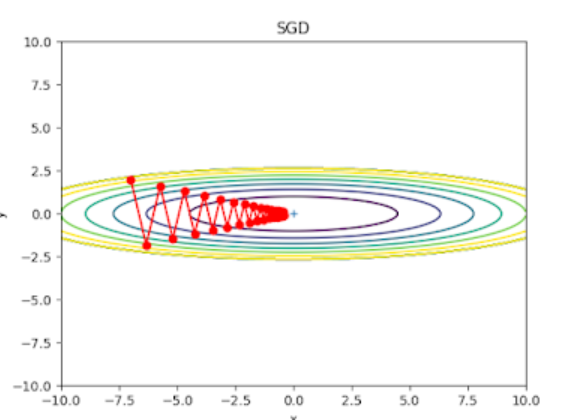
- 단점
  - y축 방향은 가파른데, x축 방향은 완만할 수 있다.
  - SGD는 심하게 굽어진 움직임을 보여준다. 상당히 비효율적인 움직임이다
  - 즉, SGD의 단점은 비등방성 함수(방향에 따라 성질, 즉 여기에서는 기울기가 달라지는지 함수) 에서 탐색 경로가 비효율적이라는 것이다. 
  - 이럴 때는 SGD 같이 무작정 기울어진 방향으로 진행하는 단순한 방식보다 더 영리한 묘안이 간절해진다.
  - 또한 SGD가 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리켜서라는 점도 생각해 볼 수 있다.
> - 단점 개선 모델
     - 모멘텀
     - AdaGrad
     - Adam


### 3) 모멘텀(Momentum)
- 운동량을 뜻하는 단어로, 물리와 관계가 있다. 
  - 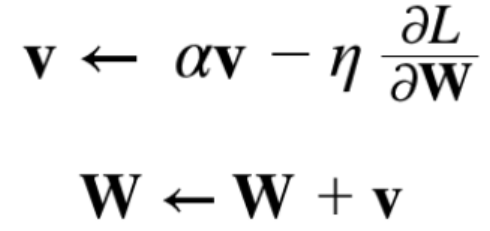

- W는 갱신할 가중치 매개변수
- ∂L/∂W는 W에 대한 손실함수의 기울기
- 에타는 학습률
- v는 물리학에서 말하는 속도에 해당된다.
> 기울기 방향으로 힘을 받아 물체가 가속된다는 물리법칙을 나타낸다. 이러한 모멘텀은 공이 그릇의 바득을 구르는 듯한 움직임을 보여준다. 또 αv항은 물체가 아무런 힘을 받지 않을 때 서서히 하강히키는 역할을 한다.(α는 0.9등의 값으로 설정) 물리에서의 지면 마찰이나 공기 저항에 해당한다.

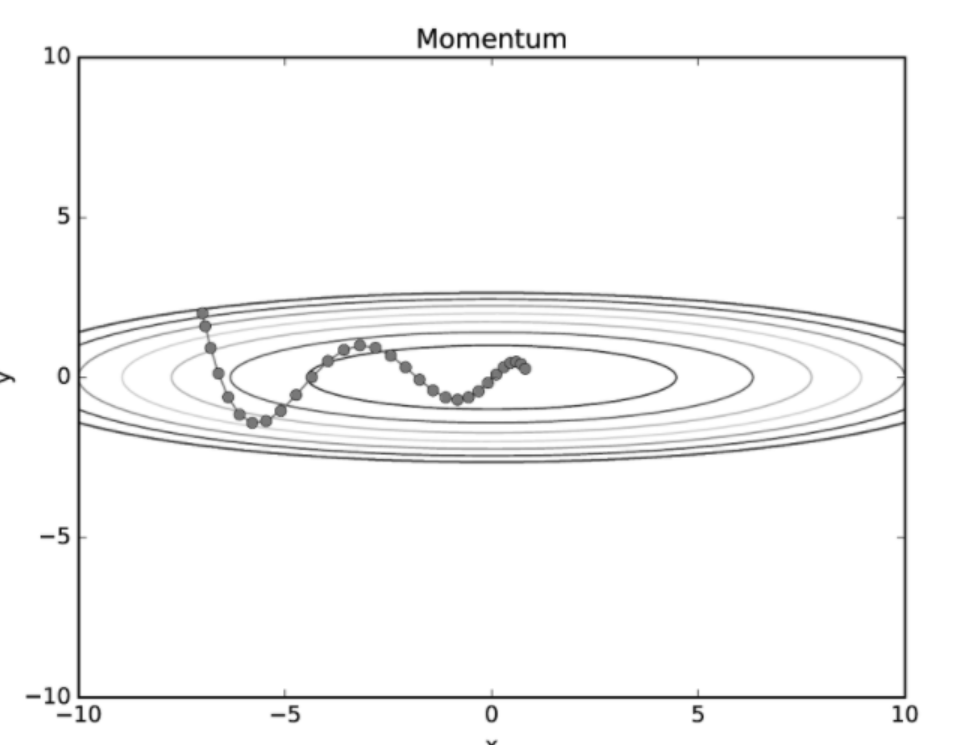

In [2]:
import numpy as np
class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None # 인스턴스 변수 v는 물체의 속도이다. 초기화때 아무값도 담지않고 대신 

  def update(self, params, grads): # update가 처음 호출될때 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)
    
    for key in params.keys():
      self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
      params[key] += self.v[key]

### 4)AdaGrad
> 신경망 학습에서는 학습률값이 중요한데 이 값이 너무 작으면 학습 시간이 너무 길어지고 반대로 너무 크면 발산하여 학습이 제대로 이뤄지지 않는다. 이 학습률을 정하는 효과적 기술로 학습률 감소가 있다. 이는 학습을 진행하면서 학습률을 점차 줄여가는 방법이다. 처음에는 크게 학습하다가 조금씩 작게 학습한다는 얘기로 실제 신경망 학습에 자주 쓰인다.<br><br> AdaGrad는 각각의 매개변수에 맞춤형값을 만들어 준다. 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행하는 것이다.

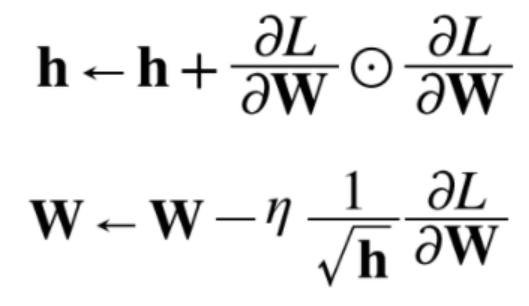

- W는 갱신할 가중치 매개변수 
- ∂L/∂W은 W에 대한 소실 함수의 기울기
- 에타는 학습률을 뜻한다.
- h는 기존 기울기 값을 제곱하여 계속 더해줌
- 1/루트h 를 곱해 학습률을 조정
> 매개변수의 원소중에서 많이 움직인 원소는 학습률이 낮아진다는 뜻인데, 다시 말해 학습률 감소가 매개변수의 원소마다 다르게 적용됨을 뜻한다.

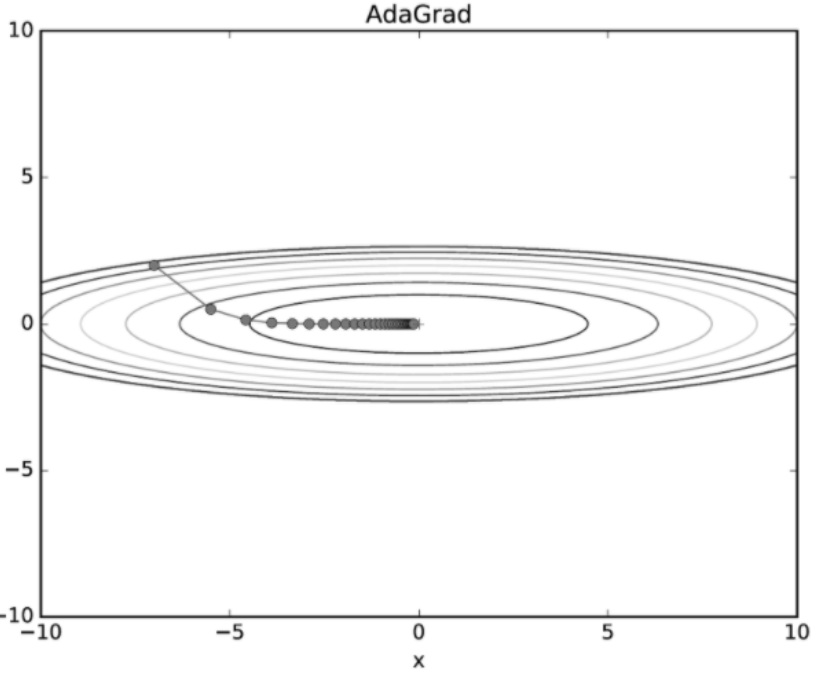

In [3]:
class AdaGrad:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None
  
  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)

    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] =- self.lr * grads[key] / (np.sqrt(self.h[key] + 1e-7))

- 1e-7이라는 작은 값을 더하는 부분을 주의해야 한다. 이 작은 값은 self.h[key]에 담겨 있다 해도 0으로 나누는 사태를 막아준다.
- 최솟값을 향해 효율적으로 움직이는 것을 알 구 있다.
- y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정한다.
- 그래서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어든다.

### 5) Adam
> 모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보였다. AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했다. 이 두가지 융합한 것이 Adam이다. Adam은 2015년에 제안된 새로운 방법 또 하이퍼파라미터의 편향 보정이 진행된다는 점도 Adam의 특징이다. 
  - 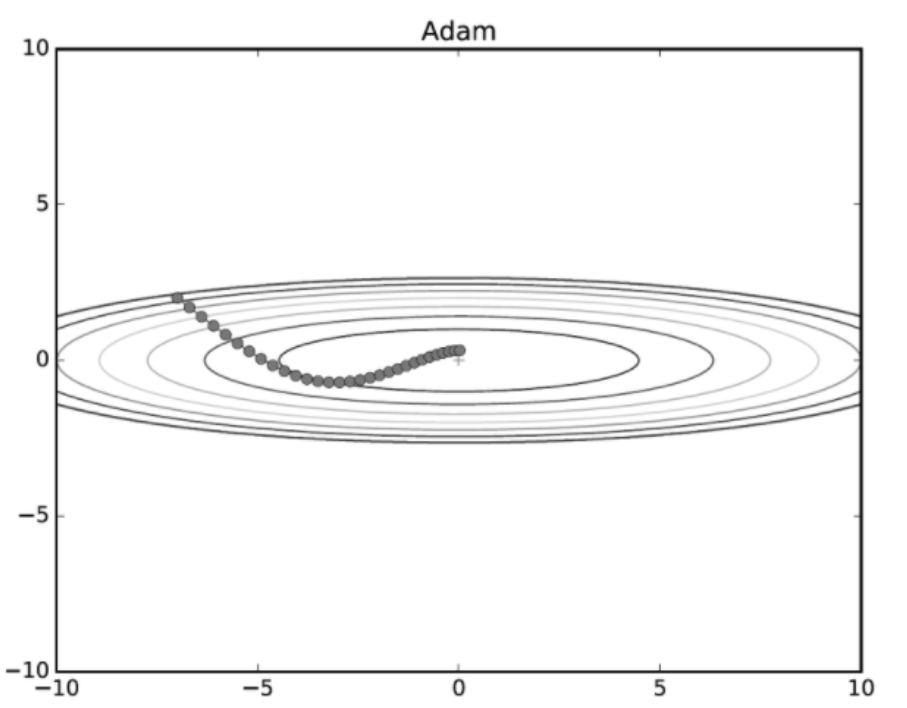

- Adam의 갱신과정도 그릇 바닥을 구르듯이 움직인다. 모멘텀과 비슷한 패턴인데
- 모멘컴 때보다 공의 좌우 흔들림이 적다.
- 이는 학습의 갱신 강도를 적응적으로 좆어해서 얻는 혜택이다.

### 6) MNIST 데이터셋으로 본 갱신 방법 비교

===========iteration:0===========
SGD:2.373404980652756
Momentum:2.395195404687879
AdaGrad:2.063043635640355
Adam:2.24988034245059
===========iteration:100===========
SGD:1.621875071134875
Momentum:0.4156490222738073
AdaGrad:0.1306710578347686
Adam:0.3101654057042176
===========iteration:200===========
SGD:0.8493560619565138
Momentum:0.20972893623067057
AdaGrad:0.08357245145254934
Adam:0.1807513163358558
===========iteration:300===========
SGD:0.6203828427014564
Momentum:0.16863546184716394
AdaGrad:0.0520974061233478
Adam:0.12734485912739701
===========iteration:400===========
SGD:0.4914679820795521
Momentum:0.17687084070154696
AdaGrad:0.04961901596205804
Adam:0.14690597852598272
===========iteration:500===========
SGD:0.47653877709000614
Momentum:0.24806583485952433
AdaGrad:0.09789208447008814
Adam:0.1693118771079542
===========iteration:600===========
SGD:0.35346230110885246
Momentum:0.16068832847145736
AdaGrad:0.0882927858249307
Adam:0.11476663401232665
===========iteration:700=====

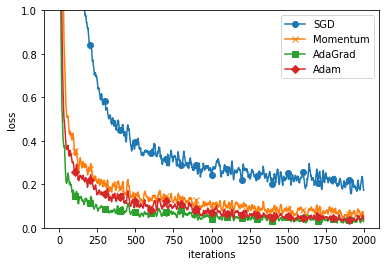

In [4]:
import os
import sys
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 2.가중치의 초깃값
> 신경망 학습에서 특히 중요한것이 가중치의 초깃값이다. 이번에는 권장 초깃값에 대해 설명하고 실험을통해 실제 신경망 학습이 신속하게 이뤄지는 모습을 확인하겠다.

### 1) 초깃값을 0으로 하면?
- 초깃값을 모두 0으로 해서는 안되는 이유(정확히는 가중치를 균일한 값으로 설정하면 안되는 이유)
  - 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다.
  - 첫번째와 두번째 층의 가중치가 이면 순전파때는 입력층의 가중치가 0이기 때문에 두 번째 층의 뉴런에 모두 같은 값이 전달된다.
  - 두번째 층의 모든 뉴런에 같은 값이 입력된다는 것은 역전파 때 두번째 층의 가중치가 모두 똑같이 갱신된다는 말이된다.
  - 그래서 가중치들은 같은 초깃값에서 시작하고 갱신을 거쳐도 여전히 같은 값을 유지하는 것이다. 이는 가중치를 여러개를 같는 의미가 없어진다.
> 해결방안은 초깃값을 무작위로 설정해야 한다.

### 2) 은닉층의 활성화값 분포
- 은닉층의 활성화의 분포를 관찰하면 중요한 정보를 얻을 수 잇다.
- 가중치의 초깃값에 따라 은닉층 활성화 값들이 어덯게 변화하는지 간단한 실험을 진행한다.
> 활성화 함수로 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입력 데이터를 흘리며 각 층의 활성화 값 분포를 히스토그램으로 그려본다.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x): # 활성화 함수는 시그모이드 함수를 이용했다.
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 입력데이터로 1000개의 데이터를 정규분포로 무작위로 생성하여 5층 신경망에 흘린다.
node_num = 100 # 각층의 뉴런은 100개씩이다.
hidden_layer_size = 5 # 5개의 층이 있다.
activations = {} # 각 층의 결과를 여기에 저장한다.

for i in range(hidden_layer_size): 
  if i != 0:
    x = activations[i-1]
  w = np.random.randn(node_num, node_num)*1# 표준편차가 1인 정규분포를 이용했는데 이 분포된 정도를 바꿔가며 활성화 값들의 분폭 어떻게 변화하는지 관찰하는 것이 실험의 목적이다.
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z

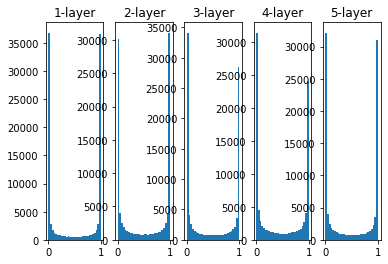

In [6]:
# 히스트그램 그리기
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1)+"-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있다.
- 시그모이드 함수는 그 출력이 0에 가까워지자 그 미분은 0에 다가선다.
- 그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기가 점점 작아지다가 사라진진다.
> 이를 기울기 소실이라고 한다. 층을 깊게 하는 딥러닝에서는 기울기 소실은 더 심각한 문제가 될 수 있다.

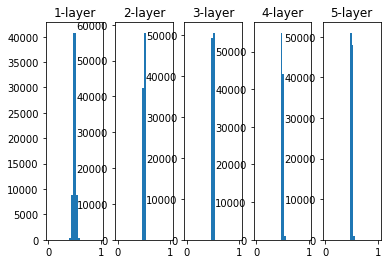

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x): # 활성화 함수는 시그모이드 함수를 이용했다.
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 입력데이터로 1000개의 데이터를 정규분포로 무작위로 생성하여 5층 신경망에 흘린다.
node_num = 100 # 각층의 뉴런은 100개씩이다.
hidden_layer_size = 5 # 5개의 층이 있다.
activations = {} # 각 층의 결과를 여기에 저장한다.

for i in range(hidden_layer_size): # 표준편차가 1인 정규분포를 이용했는데 이 분포된 정도를 바꿔가며 활성화 값들의 분폭 어떻게 변화하는지 관찰하는 것이 실험의 목적이다.
  if i != 0:
    x = activations[i-1]
  w = np.random.randn(node_num, node_num)*0.01
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z


# 히스트그램 그리기
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1)+"-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 표준편차를 0.01로 한 정규분포의 경우 각 층의 활성화 값 분포는 0.5 부근에 집중되었다.
- 기울기 문제가 발생하지 않았지만 활성화 값들이 치우쳤다는 것은 표현력 관점에서는 큰문제가 있는 것이다.
- 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러개 둔 의미가 없어진다는 뜻이다.

- 그래서 Xaver초깃값을 사용하여 각층의 활성화값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾는다.
- 그리고 앞 계층의 노드가 n개라면 표준쳔차라 1/루트n인 분포를 사용하면 된다는 결론을 이끌었다.

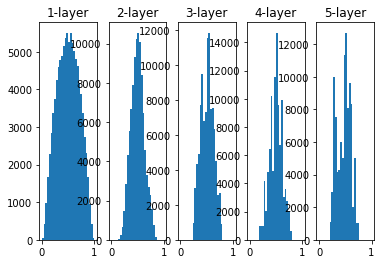

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x): # 활성화 함수는 시그모이드 함수를 이용했다.
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 입력데이터로 1000개의 데이터를 정규분포로 무작위로 생성하여 5층 신경망에 흘린다.
node_num = 100 # 각층의 뉴런은 100개씩이다.
hidden_layer_size = 5 # 5개의 층이 있다.
activations = {} # 각 층의 결과를 여기에 저장한다.

for i in range(hidden_layer_size): # 표준편차가 1인 정규분포를 이용했는데 이 분포된 정도를 바꿔가며 활성화 값들의 분폭 어떻게 변화하는지 관찰하는 것이 실험의 목적이다.
  if i != 0:
    x = activations[i-1]
  w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z


# 히스트그램 그리기
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1)+"-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 3)ReLU를 사용할 때의 가중치 초깃값
- Xaver 초깃값은 활성화 함수가 선혀인 것을 전제로 이끈 결과이다. 
- sigmoid 함수와 tanh 함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있다.그래서 Xaver 초깃값이 적당하다
> ReLU를 이용할때는 He 초깃값을 사용한다. He초깃값은 앞 계층의 노드가 n개일때, 표준편차 루트2/n인 정규분포를 사용한다. ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배의 계수가 필요하다고 할 수 있다. 
  - std = 0.01일때 각층의 활성화값들은 아주 작은 값들이다. 신경망에서 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아진다는 뜻이다. 
  - Xavier 초깃값을 결과를 보면 이쪽은 층이 깊어지면서 치우침이 조금씩 점점 커진다. 실제로 층이 깊어지면 활성화값들의 치우침도 커지고 학습할 때 기울기 소실 문제를 일으킨다.
  - He 초깃값은 모든 층에서 균일하게 분포되어있다. 층이 깊어져도 분포가 균일하게 유지되기에 역전파 때도 적절한 겂이 나올것으로 기대할 수 있다.

### 4) MNIST 데이터셋으로 본 가중치 초깃값 비교

===========iteration:0===========
std=0.01:2.3025376018375665
Xavier:2.3042652569844377
He:2.3514494800553827
===========iteration:100===========
std=0.01:2.3016589782992876
Xavier:2.223686595200862
He:1.6190948267289504
===========iteration:200===========
std=0.01:2.3014282098965646
Xavier:2.0571507177000488
He:0.8251271124659674
===========iteration:300===========
std=0.01:2.301432036330728
Xavier:1.6191181057995738
He:0.38589445456361327
===========iteration:400===========
std=0.01:2.301648002439217
Xavier:1.1468300042756883
He:0.4539729817637845
===========iteration:500===========
std=0.01:2.2989888360807047
Xavier:0.8181873209556594
He:0.43162105426174907
===========iteration:600===========
std=0.01:2.302894169262217
Xavier:0.6428765089284185
He:0.31956631095906063
===========iteration:700===========
std=0.01:2.3062489374803103
Xavier:0.5454346426461469
He:0.3643157257085927
===========iteration:800===========
std=0.01:2.298624174980551
Xavier:0.45850888049059924
He:0.286572686886

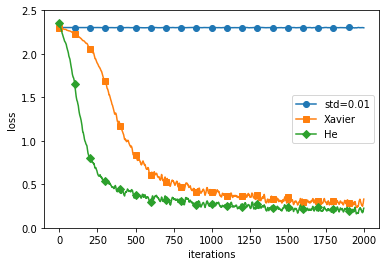

In [9]:
import os
import sys

sys.path.append("/content/drive/MyDrive/인공지능/밑시딥/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

## 3. 배치 정규화
- 학습을 빨리 진행할 수 있다.(학습 속도 개선)
- 초깃값에 크게 의존하지 않는다.(골치 아픈 초깃값 선택 작애여 안녕)
- 오버피팅을 억제한다.(드롭아웃 등의 필요성 감소)

============== 1/16 ==============
epoch:0 | 0.087 - 0.101


/content/drive/MyDrive/인공지능/밑시딥/common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.094
epoch:2 | 0.097 - 0.121
epoch:3 | 0.097 - 0.14
epoch:4 | 0.097 - 0.167
epoch:5 | 0.097 - 0.189
epoch:6 | 0.097 - 0.215
epoch:7 | 0.097 - 0.233
epoch:8 | 0.097 - 0.257
epoch:9 | 0.097 - 0.276
epoch:10 | 0.097 - 0.296
epoch:11 | 0.097 - 0.311
epoch:12 | 0.097 - 0.339
epoch:13 | 0.097 - 0.347
epoch:14 | 0.097 - 0.371
epoch:15 | 0.097 - 0.383
epoch:16 | 0.097 - 0.389
epoch:17 | 0.097 - 0.399
epoch:18 | 0.097 - 0.409


epoch:19 | 0.097 - 0.439
============== 2/16 ==============
epoch:0 | 0.094 - 0.071
epoch:1 | 0.097 - 0.111
epoch:2 | 0.097 - 0.138
epoch:3 | 0.097 - 0.18
epoch:4 | 0.097 - 0.212
epoch:5 | 0.097 - 0.247
epoch:6 | 0.097 - 0.265
epoch:7 | 0.097 - 0.296
epoch:8 | 0.097 - 0.324
epoch:9 | 0.097 - 0.347
epoch:10 | 0.097 - 0.37
epoch:11 | 0.097 - 0.379
epoch:12 | 0.097 - 0.403
epoch:13 | 0.097 - 0.42
epoch:14 | 0.097 - 0.456
epoch:15 | 0.097 - 0.468
epoch:16 | 0.097 - 0.481
epoch:17 | 0.097 - 0.507
epoch:18 | 0.097 - 0.515


epoch:19 | 0.097 - 0.521
============== 3/16 ==============
epoch:0 | 0.098 - 0.083
epoch:1 | 0.267 - 0.091
epoch:2 | 0.392 - 0.12
epoch:3 | 0.491 - 0.165
epoch:4 | 0.566 - 0.215
epoch:5 | 0.61 - 0.254
epoch:6 | 0.694 - 0.293
epoch:7 | 0.731 - 0.333
epoch:8 | 0.767 - 0.367
epoch:9 | 0.798 - 0.387
epoch:10 | 0.831 - 0.427
epoch:11 | 0.848 - 0.45
epoch:12 | 0.876 - 0.482
epoch:13 | 0.891 - 0.515
epoch:14 | 0.907 - 0.536
epoch:15 | 0.915 - 0.556
epoch:16 | 0.928 - 0.588
epoch:17 | 0.941 - 0.599
epoch:18 | 0.948 - 0.625


epoch:19 | 0.953 - 0.641
============== 4/16 ==============
epoch:0 | 0.121 - 0.098
epoch:1 | 0.294 - 0.129
epoch:2 | 0.442 - 0.182
epoch:3 | 0.538 - 0.265
epoch:4 | 0.579 - 0.35
epoch:5 | 0.626 - 0.422
epoch:6 | 0.667 - 0.482
epoch:7 | 0.707 - 0.541
epoch:8 | 0.72 - 0.594
epoch:9 | 0.739 - 0.626
epoch:10 | 0.765 - 0.654
epoch:11 | 0.78 - 0.681
epoch:12 | 0.793 - 0.708
epoch:13 | 0.813 - 0.735
epoch:14 | 0.82 - 0.752
epoch:15 | 0.837 - 0.751
epoch:16 | 0.841 - 0.775
epoch:17 | 0.842 - 0.789
epoch:18 | 0.856 - 0.801


epoch:19 | 0.873 - 0.807
============== 5/16 ==============
epoch:0 | 0.083 - 0.113
epoch:1 | 0.092 - 0.14
epoch:2 | 0.104 - 0.308
epoch:3 | 0.12 - 0.463
epoch:4 | 0.131 - 0.55
epoch:5 | 0.136 - 0.613
epoch:6 | 0.137 - 0.652
epoch:7 | 0.14 - 0.68
epoch:8 | 0.14 - 0.723
epoch:9 | 0.135 - 0.746
epoch:10 | 0.139 - 0.77
epoch:11 | 0.14 - 0.791
epoch:12 | 0.142 - 0.805
epoch:13 | 0.145 - 0.822
epoch:14 | 0.158 - 0.836
epoch:15 | 0.167 - 0.855
epoch:16 | 0.174 - 0.864
epoch:17 | 0.179 - 0.882
epoch:18 | 0.176 - 0.886


epoch:19 | 0.183 - 0.889
============== 6/16 ==============
epoch:0 | 0.061 - 0.097
epoch:1 | 0.117 - 0.2
epoch:2 | 0.116 - 0.4
epoch:3 | 0.116 - 0.538
epoch:4 | 0.116 - 0.626
epoch:5 | 0.116 - 0.693
epoch:6 | 0.116 - 0.736
epoch:7 | 0.116 - 0.774
epoch:8 | 0.116 - 0.797
epoch:9 | 0.116 - 0.813
epoch:10 | 0.117 - 0.838
epoch:11 | 0.116 - 0.85
epoch:12 | 0.116 - 0.876
epoch:13 | 0.116 - 0.893
epoch:14 | 0.116 - 0.901
epoch:15 | 0.116 - 0.915
epoch:16 | 0.116 - 0.916
epoch:17 | 0.116 - 0.925
epoch:18 | 0.116 - 0.935


epoch:19 | 0.116 - 0.942
============== 7/16 ==============
epoch:0 | 0.116 - 0.112
epoch:1 | 0.116 - 0.377
epoch:2 | 0.116 - 0.629
epoch:3 | 0.116 - 0.718
epoch:4 | 0.117 - 0.755
epoch:5 | 0.116 - 0.784
epoch:6 | 0.117 - 0.828
epoch:7 | 0.117 - 0.852
epoch:8 | 0.117 - 0.879
epoch:9 | 0.117 - 0.908
epoch:10 | 0.117 - 0.928
epoch:11 | 0.117 - 0.941
epoch:12 | 0.117 - 0.959
epoch:13 | 0.117 - 0.969
epoch:14 | 0.117 - 0.973
epoch:15 | 0.171 - 0.977
epoch:16 | 0.116 - 0.978
epoch:17 | 0.19 - 0.986
epoch:18 | 0.116 - 0.988


epoch:19 | 0.116 - 0.99
============== 8/16 ==============
epoch:0 | 0.117 - 0.11
epoch:1 | 0.116 - 0.347
epoch:2 | 0.117 - 0.61
epoch:3 | 0.117 - 0.68
epoch:4 | 0.117 - 0.811
epoch:5 | 0.117 - 0.864
epoch:6 | 0.117 - 0.916
epoch:7 | 0.117 - 0.948
epoch:8 | 0.117 - 0.957
epoch:9 | 0.117 - 0.973
epoch:10 | 0.117 - 0.983
epoch:11 | 0.117 - 0.986
epoch:12 | 0.116 - 0.991
epoch:13 | 0.116 - 0.994
epoch:14 | 0.116 - 0.995
epoch:15 | 0.117 - 0.995
epoch:16 | 0.116 - 0.996
epoch:17 | 0.117 - 0.996
epoch:18 | 0.117 - 0.996


epoch:19 | 0.117 - 0.997
============== 9/16 ==============
epoch:0 | 0.116 - 0.119
epoch:1 | 0.117 - 0.538
epoch:2 | 0.117 - 0.689
epoch:3 | 0.117 - 0.727
epoch:4 | 0.117 - 0.8
epoch:5 | 0.117 - 0.881
epoch:6 | 0.117 - 0.935
epoch:7 | 0.117 - 0.959
epoch:8 | 0.117 - 0.981
epoch:9 | 0.117 - 0.982
epoch:10 | 0.117 - 0.989
epoch:11 | 0.117 - 0.992
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.145
epoch:1 | 0.116 - 0.514
epoch:2 | 0.117 - 0.681
epoch:3 | 0.116 - 0.779
epoch:4 | 0.116 - 0.816
epoch:5 | 0.116 - 0.864
epoch:6 | 0.116 - 0.916
epoch:7 | 0.116 - 0.965
epoch:8 | 0.116 - 0.982
epoch:9 | 0.116 - 0.991
epoch:10 | 0.116 - 0.993
epoch:11 | 0.116 - 0.995
epoch:12 | 0.116 - 0.986
epoch:13 | 0.116 - 0.998
epoch:14 | 0.116 - 0.998
epoch:15 | 0.116 - 0.996
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 0.998


epoch:19 | 0.116 - 0.996
============== 11/16 ==============
epoch:0 | 0.105 - 0.144
epoch:1 | 0.117 - 0.63
epoch:2 | 0.116 - 0.654
epoch:3 | 0.116 - 0.746
epoch:4 | 0.117 - 0.77
epoch:5 | 0.117 - 0.66
epoch:6 | 0.116 - 0.794
epoch:7 | 0.116 - 0.786
epoch:8 | 0.116 - 0.803
epoch:9 | 0.117 - 0.795
epoch:10 | 0.117 - 0.81
epoch:11 | 0.116 - 0.81
epoch:12 | 0.116 - 0.812
epoch:13 | 0.116 - 0.807
epoch:14 | 0.117 - 0.815
epoch:15 | 0.117 - 0.907
epoch:16 | 0.117 - 0.908
epoch:17 | 0.117 - 0.883
epoch:18 | 0.117 - 0.885


epoch:19 | 0.117 - 0.906
============== 12/16 ==============
epoch:0 | 0.094 - 0.187
epoch:1 | 0.116 - 0.466
epoch:2 | 0.117 - 0.636
epoch:3 | 0.116 - 0.676
epoch:4 | 0.116 - 0.692
epoch:5 | 0.116 - 0.658
epoch:6 | 0.117 - 0.7
epoch:7 | 0.117 - 0.758
epoch:8 | 0.117 - 0.786
epoch:9 | 0.117 - 0.789
epoch:10 | 0.117 - 0.76
epoch:11 | 0.116 - 0.771
epoch:12 | 0.116 - 0.789
epoch:13 | 0.116 - 0.796
epoch:14 | 0.116 - 0.791
epoch:15 | 0.117 - 0.745
epoch:16 | 0.117 - 0.805
epoch:17 | 0.117 - 0.799
epoch:18 | 0.117 - 0.801


epoch:19 | 0.116 - 0.8
============== 13/16 ==============
epoch:0 | 0.116 - 0.108
epoch:1 | 0.116 - 0.563
epoch:2 | 0.116 - 0.57
epoch:3 | 0.116 - 0.266
epoch:4 | 0.116 - 0.626
epoch:5 | 0.116 - 0.673
epoch:6 | 0.116 - 0.664
epoch:7 | 0.116 - 0.667
epoch:8 | 0.116 - 0.682
epoch:9 | 0.116 - 0.604
epoch:10 | 0.116 - 0.677
epoch:11 | 0.116 - 0.691
epoch:12 | 0.116 - 0.703
epoch:13 | 0.116 - 0.702
epoch:14 | 0.116 - 0.709
epoch:15 | 0.116 - 0.707
epoch:16 | 0.116 - 0.715
epoch:17 | 0.116 - 0.713
epoch:18 | 0.116 - 0.716


epoch:19 | 0.116 - 0.712
============== 14/16 ==============
epoch:0 | 0.105 - 0.156
epoch:1 | 0.117 - 0.412
epoch:2 | 0.117 - 0.411
epoch:3 | 0.117 - 0.493
epoch:4 | 0.117 - 0.497
epoch:5 | 0.117 - 0.493
epoch:6 | 0.117 - 0.48
epoch:7 | 0.117 - 0.516
epoch:8 | 0.117 - 0.515
epoch:9 | 0.117 - 0.516
epoch:10 | 0.117 - 0.512
epoch:11 | 0.117 - 0.529
epoch:12 | 0.117 - 0.524
epoch:13 | 0.117 - 0.528
epoch:14 | 0.117 - 0.529
epoch:15 | 0.117 - 0.527
epoch:16 | 0.117 - 0.529
epoch:17 | 0.117 - 0.53
epoch:18 | 0.117 - 0.529


epoch:19 | 0.117 - 0.53
============== 15/16 ==============
epoch:0 | 0.093 - 0.126
epoch:1 | 0.116 - 0.285
epoch:2 | 0.117 - 0.381
epoch:3 | 0.117 - 0.39
epoch:4 | 0.116 - 0.397
epoch:5 | 0.116 - 0.405
epoch:6 | 0.116 - 0.396
epoch:7 | 0.116 - 0.407
epoch:8 | 0.116 - 0.41
epoch:9 | 0.116 - 0.411
epoch:10 | 0.116 - 0.417
epoch:11 | 0.116 - 0.399
epoch:12 | 0.116 - 0.422
epoch:13 | 0.116 - 0.44
epoch:14 | 0.116 - 0.429
epoch:15 | 0.116 - 0.493
epoch:16 | 0.116 - 0.468
epoch:17 | 0.116 - 0.517
epoch:18 | 0.116 - 0.503


epoch:19 | 0.116 - 0.514
============== 16/16 ==============
epoch:0 | 0.097 - 0.097
epoch:1 | 0.117 - 0.211
epoch:2 | 0.117 - 0.312
epoch:3 | 0.117 - 0.309
epoch:4 | 0.117 - 0.321
epoch:5 | 0.117 - 0.323
epoch:6 | 0.117 - 0.324
epoch:7 | 0.117 - 0.413
epoch:8 | 0.117 - 0.415
epoch:9 | 0.117 - 0.419
epoch:10 | 0.117 - 0.414
epoch:11 | 0.117 - 0.406
epoch:12 | 0.117 - 0.417
epoch:13 | 0.117 - 0.425
epoch:14 | 0.117 - 0.426
epoch:15 | 0.117 - 0.425
epoch:16 | 0.117 - 0.426
epoch:17 | 0.117 - 0.419
epoch:18 | 0.117 - 0.426
epoch:19 | 0.117 - 0.426


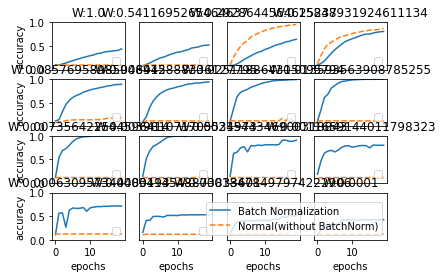

In [10]:
# coding: utf-8
import sys, os
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()


## 4. 바른 학습을 위해

### 1) 오버피팅
- 오버피팅의 원인
  - 매개변수가 많고 표현력이 높은 모델
  - 훈련 데이터가 적은 경우
> 오퍼피팅이란 신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하ㅡㄴ 상태를 말한다.

epoch:0, train acc:0.09666666666666666, test acc:0.1092
epoch:1, train acc:0.16666666666666666, test acc:0.1471
epoch:2, train acc:0.20333333333333334, test acc:0.1736
epoch:3, train acc:0.24666666666666667, test acc:0.2054
epoch:4, train acc:0.25333333333333335, test acc:0.2129
epoch:5, train acc:0.29, test acc:0.2423
epoch:6, train acc:0.30333333333333334, test acc:0.257
epoch:7, train acc:0.33666666666666667, test acc:0.2767
epoch:8, train acc:0.3466666666666667, test acc:0.2819
epoch:9, train acc:0.37333333333333335, test acc:0.2901
epoch:10, train acc:0.39666666666666667, test acc:0.2924
epoch:11, train acc:0.39666666666666667, test acc:0.2904
epoch:12, train acc:0.4, test acc:0.3044
epoch:13, train acc:0.42, test acc:0.3159
epoch:14, train acc:0.44333333333333336, test acc:0.3235
epoch:15, train acc:0.45, test acc:0.3305
epoch:16, train acc:0.45666666666666667, test acc:0.3298
epoch:17, train acc:0.49333333333333335, test acc:0.3481
epoch:18, train acc:0.5033333333333333, test ac

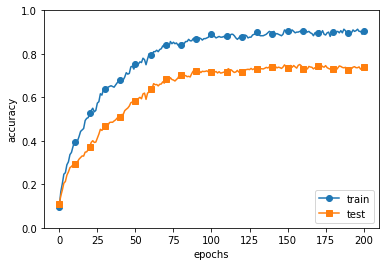

In [11]:
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


### 2) 가중치 감소
> 오퍼피팅 억제용으로 이용해온 방법 중 가중치 감소라는 것이 있다. 이는 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 패널치를 부과하여 오퍼피팅을 억제하는 방법이다. 원래 오퍼비팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문이다.
- 모든 가중치 각각의 손실함수에 1/2 사람인W^2를 더한다. 가중치의 기울기를 구하는 계산에서는 그종안의 오차역전파법에 따른 결과에 정규항을 미분한 사람인W를 더한다.
- 쉽게 말해 손실함수의 가중치의 L2norm을 더한 가중치 감소방법이다.

In [12]:
# coding: utf-8
import sys, os
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class MultiLayerNet:
    """완전연결 다층 신경망

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    weight_decay_lambda : 가중치 감소(L2 법칙)의 세기
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # 가중치 초기화
        self.__init_weight(weight_init_std)

        # 계층 생성
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """가중치 초기화
        
        Parameters
        ----------
        weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
            'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
            'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLU를 사용할 때의 권장 초깃값
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoid를 사용할 때의 권장 초깃값
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블 
        
        Returns
        -------
        손실 함수의 값
        """
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        """기울기를 구한다(수치 미분).
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads


epoch:0, train acc:0.10666666666666667, test acc:0.0847
epoch:1, train acc:0.11666666666666667, test acc:0.0881
epoch:2, train acc:0.12, test acc:0.09
epoch:3, train acc:0.12666666666666668, test acc:0.0918
epoch:4, train acc:0.12666666666666668, test acc:0.0991
epoch:5, train acc:0.13333333333333333, test acc:0.1044
epoch:6, train acc:0.14666666666666667, test acc:0.1134
epoch:7, train acc:0.15666666666666668, test acc:0.1234
epoch:8, train acc:0.18666666666666668, test acc:0.1348
epoch:9, train acc:0.23666666666666666, test acc:0.1514
epoch:10, train acc:0.25666666666666665, test acc:0.1628
epoch:11, train acc:0.2866666666666667, test acc:0.1836
epoch:12, train acc:0.31, test acc:0.1871
epoch:13, train acc:0.33666666666666667, test acc:0.2047
epoch:14, train acc:0.3466666666666667, test acc:0.2145
epoch:15, train acc:0.36, test acc:0.2254
epoch:16, train acc:0.39, test acc:0.2464
epoch:17, train acc:0.4066666666666667, test acc:0.2636
epoch:18, train acc:0.44333333333333336, test acc

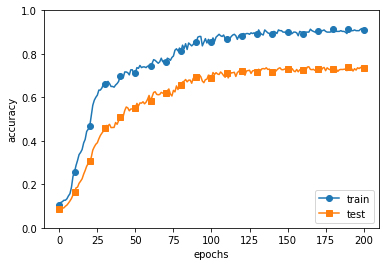

In [13]:
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


### 3)드롭아웃
- 신경망이 복잡해지면 가중치 감소만으로는 대응이 어려워진다. 이럴때는 흔히 드랍아웃(dropout)이라는 기법을 사용한다.
   - 드랍아웃은 뉴런을 임의로 삭제하면서 학습하는 방법이다. 훈련때 은닉층의 뉴런을 무작위로 골라 삭제한다. 
   - 삭제된 뉴런은 신호를 전달하지 않게 된다. 훈련 때는 데이터를 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고, 시험때는 모든 뉴런에 신호를전달한다.
   - 단, 시험 때는 각 뉴런의 출력에 훈련 때 삭제 안한 비율을 곱하여 출력한다.
   - 삭제 안 한 비율은 곱하지 않아도 좋다. 실제 딥러닝 프레임워크들도 비율을 곱하지 않는다. 
> 드롭아웃을 사용하면 표현력을 높이면서도 오버피팅을 억제할 수 있다.

In [14]:
class Dropout:
  def __init__(self, dropout_ratio=0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None

  def forward(self, x, train_flg=True):
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    else:
      return x * (1.0 - self.dropout_ratio)

  def backward(self, dout):
    return dout * self.mask

- 순전파 때 신호를 통과시키는 뉴런은 역전파 때도 신호를 그대로 통과시키고, 순전파 때 통과시키지 않는 뉴런은 역전파 때도 신호를 차단한다.

train loss:2.3293519923868358
=== epoch:1, train acc:0.1, test acc:0.0958 ===
train loss:2.342499130646567
train loss:2.346830381471082
train loss:2.319493275002454
=== epoch:2, train acc:0.1, test acc:0.0945 ===
train loss:2.320699157360318
train loss:2.328278323362438
train loss:2.3075098595352146
=== epoch:3, train acc:0.1, test acc:0.0944 ===
train loss:2.3300638087897454
train loss:2.317842611831693
train loss:2.3116065474026914
=== epoch:4, train acc:0.09, test acc:0.0949 ===
train loss:2.3144171141433327
train loss:2.3098185877313693
train loss:2.303485174052983
=== epoch:5, train acc:0.08333333333333333, test acc:0.0956 ===
train loss:2.3097225369075387
train loss:2.3032292820437714
train loss:2.3144620985396873
=== epoch:6, train acc:0.08333333333333333, test acc:0.0966 ===
train loss:2.3428821360667578
train loss:2.311040614351705
train loss:2.3230181048610303
=== epoch:7, train acc:0.08666666666666667, test acc:0.0971 ===
train loss:2.295832589014403
train loss:2.30619222401

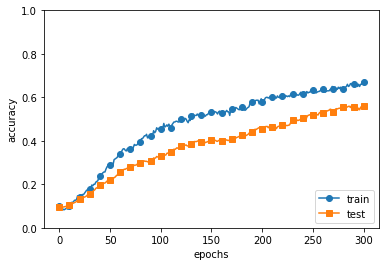

In [15]:
# coding: utf-8
import os
import sys
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


## 5.적절한 하이퍼파라미터 값 찾기
- 하이퍼파라미터의 성능을 평가할때는 시험 데이터를 사용해서는 안된다.
   - 시험 데이터를 사용하여 하이퍼파라미터를 조정하면 하이퍼파라미터 값이 시험 데이터에 오버피팅되기 때문이다.
   - 하이퍼 파라미터를 조정할 때는 하이퍼파라미터 전용 확인 데이터가 필요하다. 이를 검증 데이터(validation data)라고 부른다.
- 훈련 데이터 : 매개변수 학습
- 검증 데이터 : 하이퍼파라미터 성능 평가
- 시험 데이터 : 신경망의 범용 성능 평가

In [16]:
# coding: utf-8
import numpy as np


def smooth_curve(x):
    """손실 함수의 그래프를 매끄럽게 하기 위해 사용
    
    참고：http://glowingpython.blogspot.jp/2012/02/convolution-with-numpy.html
    """
    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]


def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블
    
    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

def conv_output_size(input_size, filter_size, stride=1, pad=0):
    return (input_size + 2*pad - filter_size) / stride + 1


def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).
    
    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩
    
    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col


def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """(im2col과 반대) 2차원 배열을 입력받아 다수의 이미지 묶음으로 변환한다.
    
    Parameters
    ----------
    col : 2차원 배열(입력 데이터)
    input_shape : 원래 이미지 데이터의 형상（예：(10, 1, 28, 28)）
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩
    
    Returns
    -------
    img : 변환된 이미지들
    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]


### 2) 하이퍼파리머터 최적화
- 최적값이 존재하는 범위를 조금씩 줄여간다는 것이다. 범위를 조금씩 줄이려면 우선 대략적인 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터 값을 골라낸(샘플링) 후, 그 값으로 정확도를 평가한다. 정확도를 잘 살피면서 이 작업을 여러번 반복하며 하이퍼파라미터의 최적 값의 범위를 좁혀가는 것이다
  - 랜덤서치가 더 적합한 이유는 최종 정확도에 미치는 영향력이 하이퍼파라미터마다 다르기 때문이다.
> - 하이퍼파라미터 값의 범위를 설정 
> - 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출
> - 이전단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가(단, 에폭은 작게 설정)
> - 전전 단계와 전단계를 특정 횟수 반복하며 그 정화도의 결과를 보고 하이퍼파리미터의 범위를 좁힘

val acc:0.05 | lr:1.4586297173552668e-06, weight decay:1.6400702842831303e-06
val acc:0.14 | lr:0.0001761892092862496, weight decay:1.2462604930911293e-07
val acc:0.13 | lr:3.6229759849720974e-05, weight decay:1.5961166878874628e-06
val acc:0.09 | lr:8.094240137641083e-06, weight decay:5.464737577931408e-06
val acc:0.13 | lr:1.1279377736022863e-06, weight decay:8.241312078234532e-08
val acc:0.11 | lr:7.015087071319396e-06, weight decay:6.186584225324303e-05
val acc:0.13 | lr:0.00013006984245054364, weight decay:3.725210971587252e-05
val acc:0.27 | lr:0.001064924110469692, weight decay:1.0162410525824492e-06
val acc:0.43 | lr:0.0025325540464604533, weight decay:8.900855344370188e-05
val acc:0.07 | lr:1.3179947596123498e-06, weight decay:2.247178442190311e-05
val acc:0.06 | lr:1.0377057247486408e-05, weight decay:1.7679902768524304e-08
val acc:0.13 | lr:1.1759528347132465e-06, weight decay:2.2477892658350655e-07
val acc:0.2 | lr:0.0013630526730903218, weight decay:3.77082669117658e-08
va

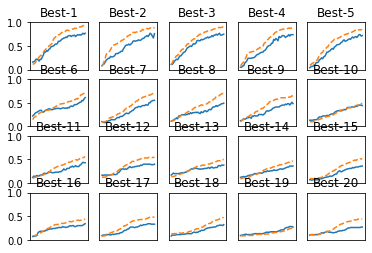

In [17]:
# coding: utf-8
import sys, os
sys.path.append("/content/drive/MyDrive/인공지능/밑시딥")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
